In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('ER Excel Case Study_October 2021.csv')

/tmp/ipykernel_6563/598522195.py:1: DtypeWarning: Columns (5,6,7,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('ER Excel Case Study_October 2021.csv')


In [3]:
df.head()

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id
0,Guwahati - Fancy Bazar,TLHOS0093,12-01-2017,10:44:52,CM/01426/Dec/17,PLAINS,8907300000000.00,8907300000000.00,1,1795,1795.0,1795.0,1795.0,0,1
1,Sikkim Namchi,TLHOS0039,12-01-2017,10:49:29,CM/00923/Dec/17,\N,8907570000000.00,8907570000000.00,1,2695,2695.0,2195.0,2195.0,0,2
2,Dibrugarh,TLHOS0088,12-01-2017,10:54:50,CM/01900/Dec/17,\N,8907570000000.00,8907570000000.00,1,1995,1995.0,1995.0,1995.0,0,3
3,Dibrugarh,TLHOS0088,12-01-2017,10:54:50,CM/01900/Dec/17,TROUSER,8907570000000.00,8907570000000.00,1,1695,1695.0,1695.0,1695.0,0,3
4,Dibrugarh,TLHOS0088,12-01-2017,10:54:50,CM/01900/Dec/17,8.91E+12,8907430000000.00,8907430000000.00,1,5495,5495.0,5495.0,5495.0,0,3


In [4]:
df['Customer Id'].nunique()

98260

In [5]:
df.shape

(283114, 15)

### Cleaning the data

In [6]:
a = df['ItemQty'].value_counts()
a

ItemQty
 1     191374
 0      83626
-1       6777
 2        876
 3        261
 17       128
 4         23
-2         21
 5         10
 6          5
 10         5
-3          2
 8          1
 7          1
 25         1
 16         1
 12         1
 20         1
Name: count, dtype: int64

In [7]:
df = df.drop(df[df['ItemQty'] < 0].index)

In [8]:
a = df['ItemQty'].value_counts()
a

ItemQty
1     191374
0      83626
2        876
3        261
17       128
4         23
5         10
6          5
10         5
8          1
7          1
25         1
16         1
12         1
20         1
Name: count, dtype: int64

In [9]:
df.shape

(276314, 15)

In [10]:
df2=pd.read_excel('item master.xlsx')
df2.head()

,UniqueItemCode,UniqueItemName,BarCode,DepartmentName,DepartmentCode,CategoryName,CategoryCode,SubCategoryName,SubCategoryCode,ItemDescription
0,8900000000000,PLAINS,\N,OTSH,OTSH,RARE,RARE,PLAINS,PLAINS,SOLIDS
1,8910000000000,ACCESSORIES,\N,OTAC,OTAC,NaN,NaN,ACCESSORIES,ACCESSORIES,TIE
2,45497100001,SOLIDS,\N,OTTR,OTTR,RELAXED WASH,RELAXED WASH,SOLIDS,SOLIDS,STRIPES
3,48403100001,ACCESSORIES,\N,OTAC,OTAC,NaN,NaN,ACCESSORIES,ACCESSORIES,POCKET SQUARE
4,48405300001,ACCESSORIES,\N,OTAC,OTAC,NaN,NaN,ACCESSORIES,ACCESSORIES,POCKET SQUARE


##  Month on Month New Customers Acquired, Total Transacting Customers, Repeat Customers, Bills, Sales

In [11]:

# Convert the transaction_date column to datetime
df['ModifiedTxnDate'] = pd.to_datetime(df['ModifiedTxnDate'],format='mixed')

# Find the first purchase date for each customer
first_purchase = df.groupby('Customer Id')['ModifiedTxnDate'].min().reset_index()

# Extract year and month from the first purchase date
first_purchase['year'] = first_purchase['ModifiedTxnDate'].dt.year
first_purchase['month'] = first_purchase['ModifiedTxnDate'].dt.month

# Count new customers per month
new_customers_per_month = first_purchase.groupby(['year', 'month']).size().reset_index(name='new_customers')

# Display the result
print(new_customers_per_month)


   year  month  new_customers
0  2017     12          12060
1  2018      1          13455
2  2018      2           9460
3  2018      3           7543
4  2018      4          11126
5  2018      5           7066
6  2018      6          10562
7  2018      7          12504
8  2018      8           7648
9  2018      9           6836


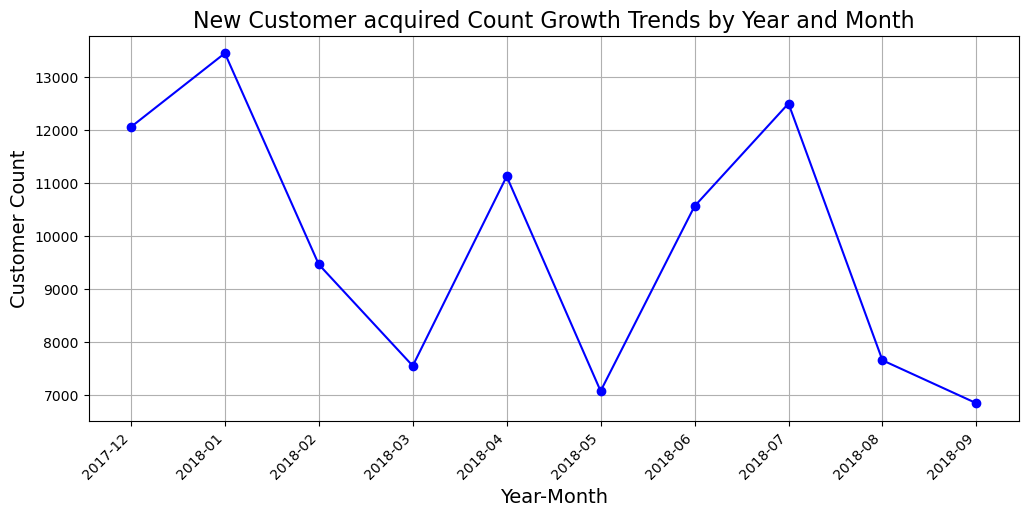

In [26]:
import matplotlib.pyplot as plt
new_customers_per_month['YearMonth'] = new_customers_per_month['year'].astype(str) + '-' + new_customers_per_month['month'].astype(str).str.zfill(2)

# Plotting the data
plt.figure(figsize=(12, 5))
plt.plot(new_customers_per_month['YearMonth'], new_customers_per_month['new_customers'], marker='o', linestyle='-', color='b')

# Enhancing the plot
plt.title('New Customer acquired Count Growth Trends by Year and Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

In [27]:
df['year'] = df['ModifiedTxnDate'].dt.year
df['month'] = df['ModifiedTxnDate'].dt.month
total_transacting_customers = df.groupby(['year','month'])['Customer Id'].nunique().reset_index(name='total_tran_customers')
print(total_transacting_customers)

   year  month  total_tran_customers
0  2017     12                  6199
1  2018      1                  8838
2  2018      2                  5504
3  2018      3                  5099
4  2018      4                  8250
5  2018      5                  5569
6  2018      6                  8311
7  2018      7                 12153
8  2018      8                  6495
9  2018      9                  5740


In [28]:
df2=df[df.duplicated(subset=['Customer Id'], keep=False)]

In [29]:
total_transacting_customers = df.groupby(['year','month'])['Customer Id'].nunique().reset_index(name='Customer Id')
print(total_transacting_customers)

   year  month  Customer Id
0  2017     12         6199
1  2018      1         8838
2  2018      2         5504
3  2018      3         5099
4  2018      4         8250
5  2018      5         5569
6  2018      6         8311
7  2018      7        12153
8  2018      8         6495
9  2018      9         5740


In [30]:
# Initialize an empty list to store the results
results = []

# Iterate through each unique combination of year and month
for year in df['year'].unique():
    for month in range(1, 13):
        if df[(df['year'] == year) & (df['month'] == month)].empty:
            continue
        
        # Customers who made transactions in the current month
        current_customers = df[(df['year'] == year) & (df['month'] == month)]['Customer Id'].unique()
        
        # Customers who made transactions before the current month
        previous_customers = df[(df['ModifiedTxnDate'] < f'{year}-{month:02d}-01')]['Customer Id'].unique()
        
        # Identify repeating customers
        repeating_customers = len(set(current_customers) & set(previous_customers))
        
        # Append the result to the list
        results.append({
            'year': year,
            'month': month,
            'Repeating Customers': repeating_customers
        })

# Convert the results list to a DataFrame
repeat_customers_df = pd.DataFrame(results)

print("Month-on-Month Repeating Customers:\n", repeat_customers_df)

Month-on-Month Repeating Customers:
    year  month  Repeating Customers
0  2018      1                  644
1  2018      2                  966
2  2018      3                 1023
3  2018      4                 1411
4  2018      5                 1223
5  2018      6                 1949
6  2018      7                 2707
7  2018      8                 1860
8  2018      9                 1607
9  2017     12                    0


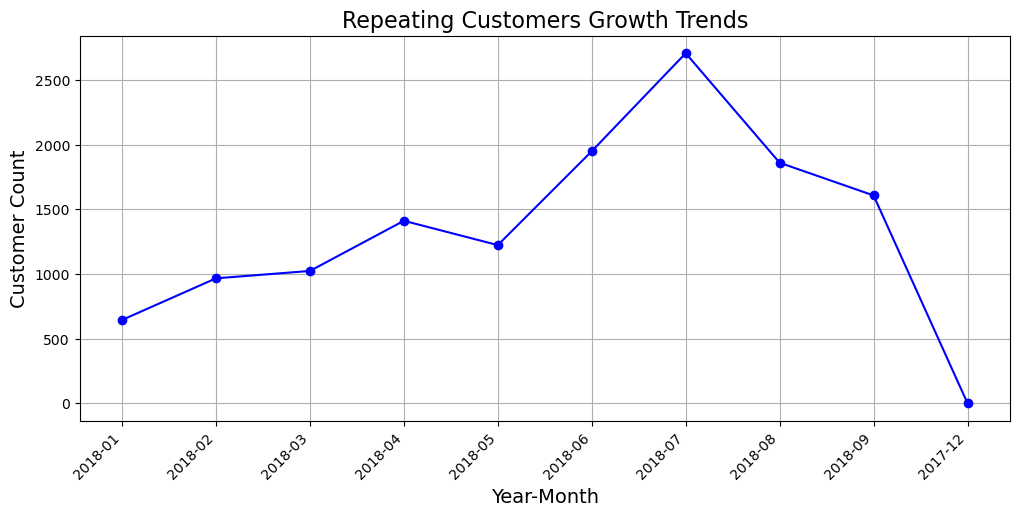

In [31]:
repeat_customers_df['YearMonth'] = repeat_customers_df['year'].astype(str) + '-' + repeat_customers_df['month'].astype(str).str.zfill(2)

# Plotting the data
plt.figure(figsize=(12, 5))
plt.plot(repeat_customers_df['YearMonth'], repeat_customers_df['Repeating Customers'], marker='o', linestyle='-', color='b')

# Enhancing the plot
plt.title('Repeating Customers Growth Trends', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

In [32]:
# Group by Bill Number and count unique items per bill
product_counts_per_bill = df.groupby('ModifiedBillNo')['ItemQty'].count()

# Calculate the average number of products per bill
avg_products_per_bill = product_counts_per_bill.mean()


print("Product Counts Per Bill:\n", product_counts_per_bill)
print("\nAverage Products Per Bill:", avg_products_per_bill)

Product Counts Per Bill:
 ModifiedBillNo
CM/00001/Apr/18    99
CM/00001/Aug/18     2
CM/00001/Jan/18     1
CM/00001/Jul/18     2
CM/00001/Jun/18     1
                   ..
CM/05961/Mar/18     5
CM/05963/Mar/18     3
CM/05964/Mar/18     2
CM/05965/Mar/18     6
CM/05966/Mar/18     2
Name: ItemQty, Length: 21965, dtype: int64

Average Products Per Bill: 8.106259959025722


In [33]:
df.to_csv('product_counts_per_bill')

In [34]:
df['ItemPaidAmount'].mean()


28833198.372915912

## What is the Customer Fall Out Rate, meaning what % of customer base repeats after getting acquired? Show the trend between Lifetime Visits and Customer Count?


In [35]:
# Identify the total number of unique customers
total_customers = df['Customer Id'].nunique()

# Identify customers who made more than one purchase
repeat_customers = df['Customer Id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].index

# Number of repeat customers
num_repeat_customers = len(repeat_customers)

# Calculate the customer fall out rate
fall_out_rate = ((total_customers - num_repeat_customers) / total_customers) * 100

print("Total Customers:", total_customers)
print("Repeat Customers:", num_repeat_customers)
print("Customer Fall Out Rate: {:.2f}%".format(fall_out_rate))


Total Customers: 58768
Repeat Customers: 34285
Customer Fall Out Rate: 41.66%


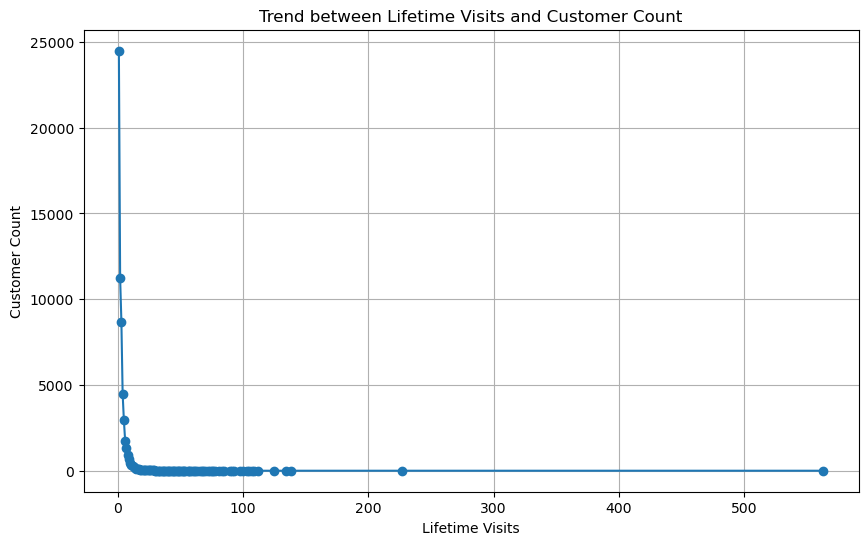

    LifetimeVisits  CustomerCount
0                1          24483
1                2          11222
2                3           8688
3                4           4471
4                5           2930
..             ...            ...
83             125              1
84             134              1
85             138              1
86             227              1
87             563              1

[88 rows x 2 columns]


In [36]:


# Calculate lifetime visits for each customer
lifetime_visits = df['Customer Id'].value_counts().reset_index()
lifetime_visits.columns = ['Customer Id', 'VisitCount']

# Group by visit count to find number of customers with each visit count
visit_trend = lifetime_visits.groupby('VisitCount')['Customer Id'].count().reset_index()
visit_trend.columns = ['LifetimeVisits', 'CustomerCount']

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(visit_trend['LifetimeVisits'], visit_trend['CustomerCount'], marker='o')
plt.title('Trend between Lifetime Visits and Customer Count')
plt.xlabel('Lifetime Visits')
plt.ylabel('Customer Count')
plt.grid(True)
plt.show()

print(visit_trend)


# Of the customers who Repeat, what is the average gap between any 2 successive visits? 

In [37]:

# Convert 'Date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'])

# Sort by Cust_ID and Date
df = df.sort_values(by=['Customer Id', 'ModifiedTxnDate'])

# Calculate the gap between successive visits
df['Gap'] = df.groupby('Customer Id')['ModifiedTxnDate'].diff().dt.days

# Drop the first NaN values which result from the diff operation
df = df.dropna()

# Calculate the average gap for each customer
average_gaps = df.groupby('Customer Id')['Gap'].mean().reset_index()

# Rename columns for clarity
average_gaps.columns = ['Customer Id', 'Average_Gap']

print(average_gaps)

       Customer Id  Average_Gap
0                2    85.500000
1                3     0.000000
2                6     0.801887
3                8     8.625000
4               12     5.625000
...            ...          ...
34280        98247     0.000000
34281        98252     0.000000
34282        98254     0.000000
34283        98259     0.000000
34284        98260     0.000000

[34285 rows x 2 columns]


In [38]:
average_gaps = df.groupby('Customer Id')['Gap'].mean()
average_gaps.mean()

8.520163152512318

# Product afinity

In [39]:
import pandas as pd
from scipy.sparse import coo_matrix
from itertools import combinations
import numpy as np

# Load the CSV file into a DataFrame
#df = pd.read_csv('reduced_file.csv')

# Convert the 'ModifiedTxnDate' column to datetime format
df['ModifiedTxnDate'] = pd.to_datetime(df['ModifiedTxnDate'], format='mixed', errors='coerce')

# Extract the day of the week from the 'ModifiedTxnDate' column
df['DayOfWeek'] = df['ModifiedTxnDate'].dt.day_name()

# Create a boolean column to identify weekdays and weekends
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Map unique 'UniqueItemCode' values to integer values
unique_items = df['UniqueItemCode'].unique()
item_mapping = {item: idx for idx, item in enumerate(unique_items)}

# Calculate product affinity (based on co-occurrence of items in the same transaction)
product_affinity = coo_matrix((len(unique_items), len(unique_items)), dtype=np.int64)
batch_size = 10000  # Adjust the batch size as per your system's memory capacity
for start in range(0, len(df), batch_size):
    end = start + batch_size
    batch_df = df.iloc[start:end]
    item_pairs = batch_df.groupby('ModifiedBillNo')['UniqueItemCode'].apply(lambda x: list(combinations(x.unique(), 2))).explode().reset_index()
    item_pairs.columns = ['ModifiedBillNo', 'item_pair']
    item_pairs['count'] = 1
    item_pairs['item_pair'] = item_pairs['item_pair'].apply(lambda x: tuple(item_mapping[item] for item in x) if pd.notnull(x) else tuple())
    item_pairs = item_pairs[item_pairs['item_pair'] != tuple()]
    item_pairs = item_pairs.groupby('item_pair')['count'].sum().reset_index()
    row, col = zip(*item_pairs['item_pair'])
    data = item_pairs['count'].tolist()
    batch_affinity = coo_matrix((data, (row, col)), shape=(len(unique_items), len(unique_items)))
    product_affinity += batch_affinity

print("\nProduct Affinity:\n", product_affinity)

# Calculate category popularity
category_popularity = df.groupby('UniqueItemName')['ItemNetAmount'].sum().reset_index().sort_values('ItemNetAmount', ascending=False)
print("\nCategory Popularity:\n", category_popularity.head(10))

# Compare weekday vs. weekend sales
weekday_sales = df[~df['IsWeekend']]['ItemNetAmount'].sum()
weekend_sales = df[df['IsWeekend']]['ItemNetAmount'].sum()
print(f"\nWeekday Sales: {weekday_sales:.2f}")
print(f"Weekend Sales: {weekend_sales:.2f}")

# Other potential analysis
# - Time-series analysis of sales trends
# - Customer segmentation and analysis
# - Promotional effectiveness analysis

# Observations and recommendations
# ... (same as before)


Product Affinity:
   (0, 2)	487
  (0, 3)	705
  (0, 4)	8
  (0, 5)	21
  (0, 6)	157
  (0, 57)	29
  (0, 59)	130
  (0, 60)	226
  (0, 294)	88
  (0, 338)	21
  (0, 419)	4
  (0, 496)	3
  (0, 636)	1
  (0, 656)	1
  (0, 710)	1
  (0, 806)	5
  (0, 899)	1
  (0, 1009)	1
  (0, 1031)	1
  (0, 1044)	1
  (0, 1162)	1
  (0, 1215)	1
  (0, 1257)	1
  (0, 1387)	1
  (0, 1423)	1
  :	:
  (16140, 0)	1
  (16141, 16225)	1
  (16143, 0)	1
  (16145, 0)	1
  (16151, 0)	1
  (16151, 3)	1
  (16152, 0)	1
  (16157, 0)	1
  (16157, 3)	1
  (16158, 0)	1
  (16158, 3)	1
  (16163, 16211)	1
  (16165, 0)	1
  (16165, 3)	1
  (16172, 0)	1
  (16178, 0)	1
  (16178, 3)	1
  (16185, 0)	1
  (16212, 3)	1
  (16222, 0)	1
  (16222, 2)	1
  (16222, 3)	1
  (16222, 57)	1
  (16229, 60)	1
  (16229, 294)	1

Category Popularity:
         UniqueItemName  ItemNetAmount
3      8910000000000.0    86412136.73
7             8.91E+12    16914034.26
16228               \N     4387938.12
16221           PLAINS      349698.39
16220    JEANS TROUSER      160803.97
16